In [1]:
# import libraries
import numpy as np
import cv2
from PIL import Image,ImageOps
from matplotlib import pyplot as plt

# to hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
def hist(im):
    histogram=np.zeros(256)
    for i in range(0,row):
        for j in range(0,col):
            k=im[i,j]
            histogram[k]+=1
    return histogram

In [3]:
def within_threshold(histogram):
    min_fn= np.inf
    thresh = -1
    for i in range(len(histogram)):
        x,y = np.split(histogram,[i]) # divide in two classes x and y
        
        #calculate weight
        wx = np.sum(x)/(row*col) #weight of class 1
        wy = np.sum(y)/(row*col) #weight of class 2
        
        #calculate mean
        mx = np.sum([ j*t for j,t in enumerate(x)])/np.sum(x) #mean in x
        my = np.sum([ j*t for j,t in enumerate(y)])/np.sum(y) #mean in y
        
        #calculate variance
        vx = np.sum([ (j-x2)**2*t for j,t in enumerate(x)])/np.sum(x) #variance in x
        vx = np.nan_to_num(x3) #because first value is nan
        vy = np.sum([ (j-y2)**2*t for j,t in enumerate(y)])/np.sum(y) #variance in y
        fn = wx*vx + wy*vy #minimization value
        if fn<min_fn:
            min_fn=fn
            thresh=i
    return thresh

In [19]:
def between_threshold(histogram):
    max_fn = -np.inf
    thresh = -1
    d=0
    for i in range(len(histogram)):
        x,y = np.split(histogram,[i]) # divide in two classes x and y
        
        #calculate weight
        wx = np.sum(x)/(row*col) #weight of class 1
        wy = np.sum(y)/(row*col) #weight of class 2
        #calculate mean
        mx = np.sum([ j*t for j,t in enumerate(x)])/np.sum(x) #mean in x
        mx = np.nan_to_num(x2)
        my = np.sum([ (j+d)*t for j,t in enumerate(y)])/np.sum(y) #mean in y
        #calculate variance
        vx = np.sum([ (j-x2)**2*t for j,t in enumerate(x)])/np.sum(x) #variance in x
        vx = np.nan_to_num(x3)
        vy = np.sum([ (j+d-y2)**2*t for j,t in enumerate(y)])/np.sum(y) #variance in y
        
        d=d+1
        fn= wx*wy*(vx-vy)*(vx-vy)
        if fn>max_fn:
            max_fn=fn
            thresh=i
    return thresh

In [20]:
def regenerate(im,thresh):
    new_image=np.zeros((row,col))
    for i in range(0,row):
        for j in range(0,col):
            if im[i,j] >= thresh:
                new_image[i,j]=255
            else:
                new_image[i,j]=0
    return new_image

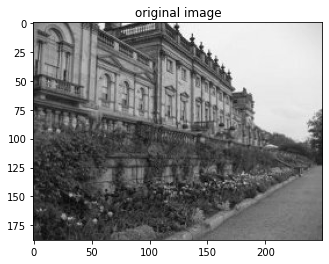

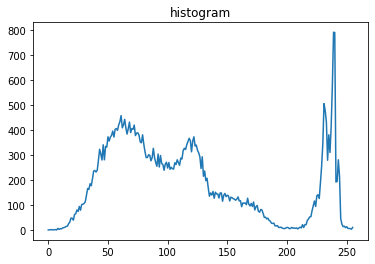

147
147


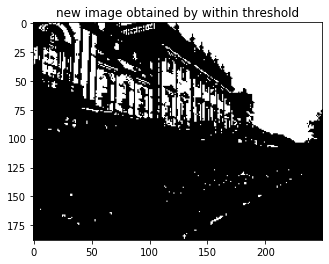

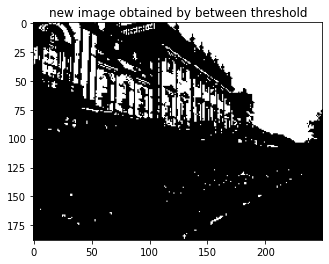

In [23]:
if __name__=="__main__":
    #read the original image
    im=Image.open(r'C:\Users\shiva\Desktop\sem4\DIP\org.jpg')
    im=np.asarray(im)
    #display the original image
    plt.title("original image")
    plt.imshow(im,cmap='gray')
    plt.show()

    # calculate rows and columns of image
    row,col=im.shape
    h=hist(im)
    plt.title("histogram")
    plt.plot(h)
    plt.show()
    t=within_threshold(h)
    print(t)
    t1=between_threshold(h)
    print(t1)
    new_image=regenerate(im,t)
    plt.title("new image obtained by within threshold")
    plt.imshow(new_image,cmap='gray')
    plt.show()
    new_image=regenerate(im,t1)
    plt.title("new image obtained by between threshold")
    plt.imshow(new_image,cmap='gray')
    plt.show()
